# <div align = 'center'>Exploratory Data Analysis for Loan Interest Rate Prediction</div>
### Analysis contained in this notebook:

###### Dataset Information
* Data Information
* 5 point summary for numerical features
* 5 point summary for categorical features

###### Univariate Analysis
* Distribution plots
* Boxplots for each feature
* Proportion Plots

###### Bivariate Analysis
* Correlation
* Scatter Plot
* Boxplot

###### Statistical Analysis
* Anova Test (Numerical vs Categorical)
* Tukey HSD test (To check if mean difference is present)
* Chi Square Test(Categorical vs Categorical)

###### Importing the necessary libraries

In [53]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
data = pd.read_csv('Data/capstone_train.csv')
train = data.copy()

In [55]:
train.shape

(164309, 14)

In [56]:
train.sample(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
75690,10075691,"13,500",3 years,Rent,125627.0,VERIFIED - income,credit_card,12.89,1,NaN,17,36,Male,3
52732,10052733,"24,600",1 year,NaN,102000.0,VERIFIED - income,other,4.24,0,NaN,16,42,Female,3
158899,10158900,"25,000",6 years,Mortgage,65000.0,VERIFIED - income source,debt_consolidation,33.25,0,61.0,15,25,Female,3
87427,10087428,"8,000",10+ years,Mortgage,75000.0,not verified,credit_card,14.56,0,48.0,10,29,Male,1
122125,10122126,"15,000",< 1 year,Rent,67000.0,VERIFIED - income source,credit_card,11.84,1,NaN,7,15,Male,3


## Dataset Information

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

###### Inferences

* Loan amount requested is coming in categorical summary. Data Type for this column must be changed.
* Drop Loan_ID since it is unique for each entry.
* Missing values are present in the dataset.

###### Removing Loan ID

In [58]:
train = train.drop(['Loan_ID'],axis = 1)

###### Changing Loan_Amount_Requested datatype to int

In [59]:
import string
def remove_punctuation(x):
    if len(x.split(','))>1:
        return int(x.split(',')[0]+x.split(',')[1])
    else:
        return int(x)
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].apply(remove_punctuation)

### 5 point Summary

In [60]:
#For numerical data
train.describe(percentiles = [0.25,0.5,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
Loan_Amount_Requested,164309.0,14349.336920,8281.868700,500.0,8000.00,12075.00,20000.00,35000.00,35000.00
Annual_Income,139207.0,73331.159434,60377.498294,4000.0,45000.00,63000.00,88697.50,240000.00,7500000.00
Debt_To_Income,164309.0,17.207189,7.845083,0.0,11.37,16.84,22.78,34.67,39.99
Inquiries_Last_6Mo,164309.0,0.781698,1.034747,0.0,0.00,0.00,1.00,4.00,8.00
Months_Since_Deliquency,75930.0,34.229356,21.761180,0.0,16.00,31.00,50.00,80.00,180.00
Number_Open_Accounts,164309.0,11.193818,4.991813,0.0,8.00,10.00,14.00,27.00,76.00
Total_Accounts,164309.0,25.067665,11.583067,2.0,17.00,23.00,32.00,59.00,156.00
Interest_Rate,164309.0,2.158951,0.738364,1.0,2.00,2.00,3.00,3.00,3.00


In [61]:
#For categorical data
train.select_dtypes('object').describe().T

,count,unique,top,freq
Length_Employed,156938,11,10+ years,52915
Home_Owner,138960,5,Mortgage,70345
Income_Verified,164309,3,VERIFIED - income,59421
Purpose_Of_Loan,164309,14,debt_consolidation,97101
Gender,164309,2,Male,117176


In [62]:
train.isna().sum()[train.isna().sum()!=0]/len(train)*100

Length_Employed             4.486060
Home_Owner                 15.427639
Annual_Income              15.277313
Months_Since_Deliquency    53.788289
dtype: float64

### Inferences

###### Numerical Summary
* **Annual_Income** has a max value of $7500000$ which may be an anomaly since 99th percentile value is $240000$ which is much lesser than max value.
* **Debt_To_Income** An ideal debt_to_income ratio between 21-35% is considered good and in this dataset max val is 39.99. This feature is ok.
* **Months_Since_Deliquency** has many missing values however the feature itself may or may not be important.
* **Number_Open_Accounts** The average American have 4 credit cards, according to the 2019 Experian Consumer Credit Review. This feature has outliers since even if we take standard deviation of 3 on above info we would get around 13 open credit accounts. Here there are far too many outliers.
* **Total_Accounts** There are outliers in this column.

###### Categorical Summary

* **Length_Employed** has 11 unique categories but +10 seems to have the most records since it covers a big bracket.
* **Home_Owner** Most loan applicants in our dataset have a mortgage on their house.
* **Income_Verified** Most loan applicants have verified income.
* **Purpose_Of_Loan** Loan applicants are looking to stream line their debt into one credit line instead of having multiple credit lines. They are taking loans to pay off their credit card bills.
* **Gender** There are more male loan applicants than female in the dataset.


# Univariate Analysis

###### Distriibution Plots for numerical features

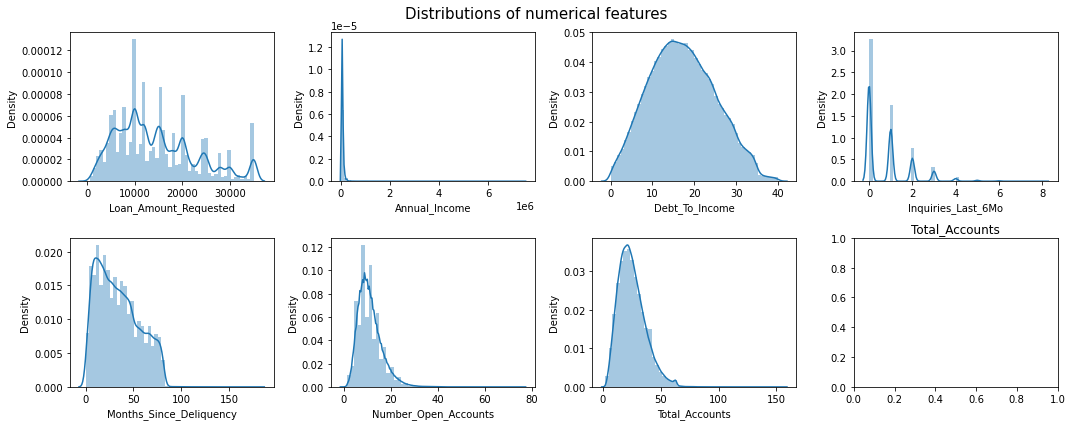

In [25]:
data_dist = train.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,6))
for variables,plotsubs in zip(data_dist.columns,ax.flatten()):
    plt.title(variables)
    plotsubs.tick_params(labelsize = 10)
    plotsubs.set_xlabel(variables,fontsize = 10)
    sns.distplot(data_dist[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92) 
fig.suptitle('Distributions of numerical features',fontsize = 15)
plt.show()

We see in the below plots that most of the features show positive skewness(right skewed). In such cases the mean of the respective columns are greater than their median.

###### Boxplots for each numberical feature

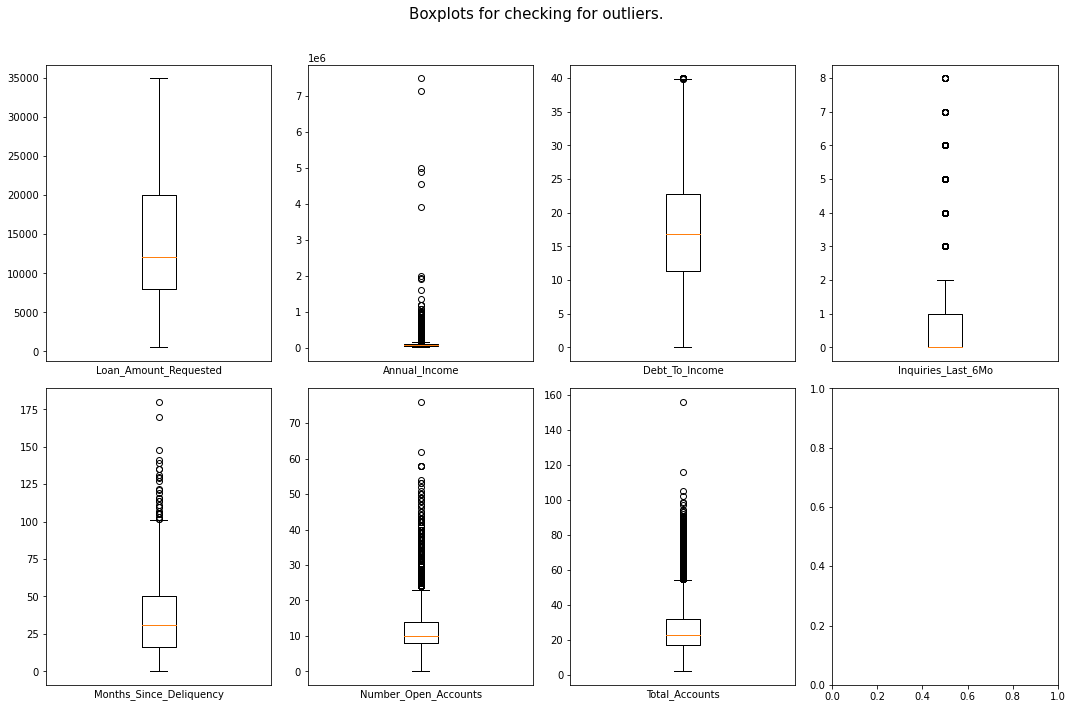

In [26]:
fig,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,10))

for variables,plotsubs in zip(data_dist.select_dtypes(np.number).columns,ax.flatten()):
    
    plotsubs.tick_params(labelsize = 10)
    plotsubs.boxplot(data_dist[variables].dropna())
    plotsubs.set_xticks([])
    plotsubs.set_xlabel(variables,fontsize = 10)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.90)
    
fig.suptitle('Boxplots for checking for outliers.',fontsize = 15)
plt.show()

###### Proportion Plot for target variable

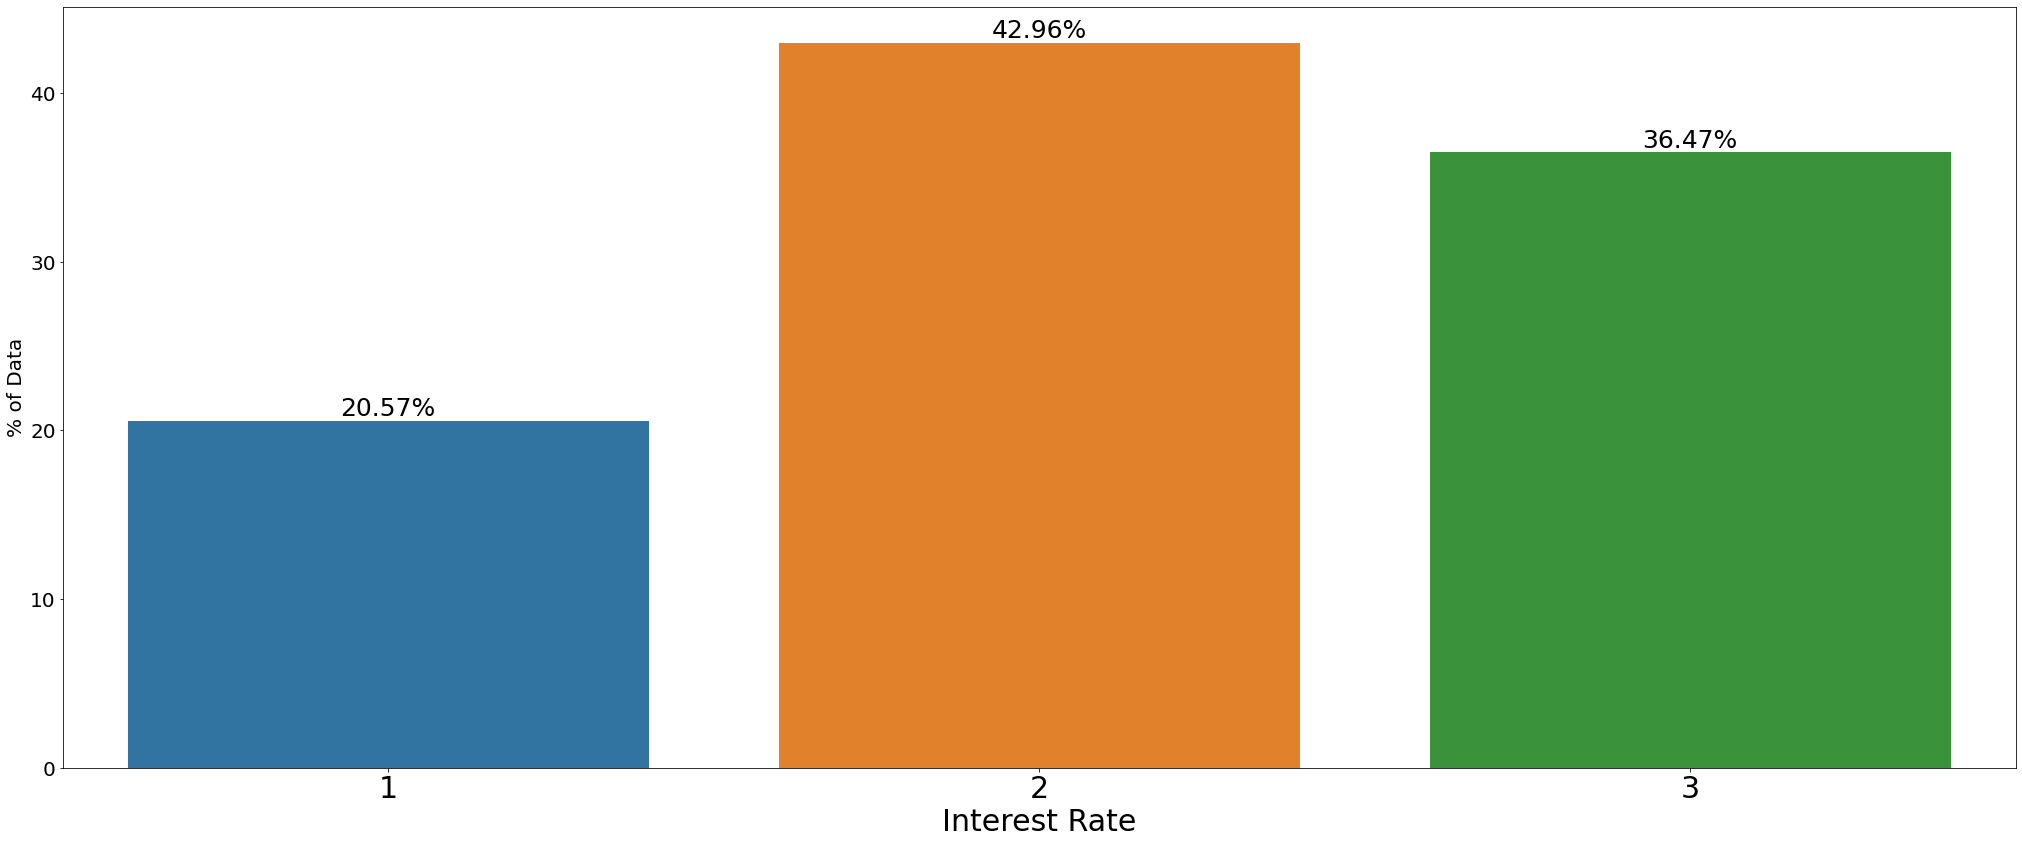

In [51]:
ir_cnt = round(train['Interest_Rate'].value_counts()/len(train)*100,2).sort_values(ascending = False)
plt.figure(figsize = (35,14))
plots = sns.barplot(ir_cnt.index,ir_cnt.values,orient = 'v')

for bar in plots.patches:   
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 12) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height(), '.2f')+'%',  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=25, xytext=(0,12), 
                   textcoords='offset points') 

plt.xticks(fontsize=30)
plt.ylabel('% of Data',fontsize = 20)
plt.xlabel('Interest Rate',fontsize = 30)
plt.yticks(fontsize=20)
plt.show()
#There is some disbalance in the dataset. We could perform over or under sampling

###### Proportion plots for all categorical columns

In [30]:
train.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

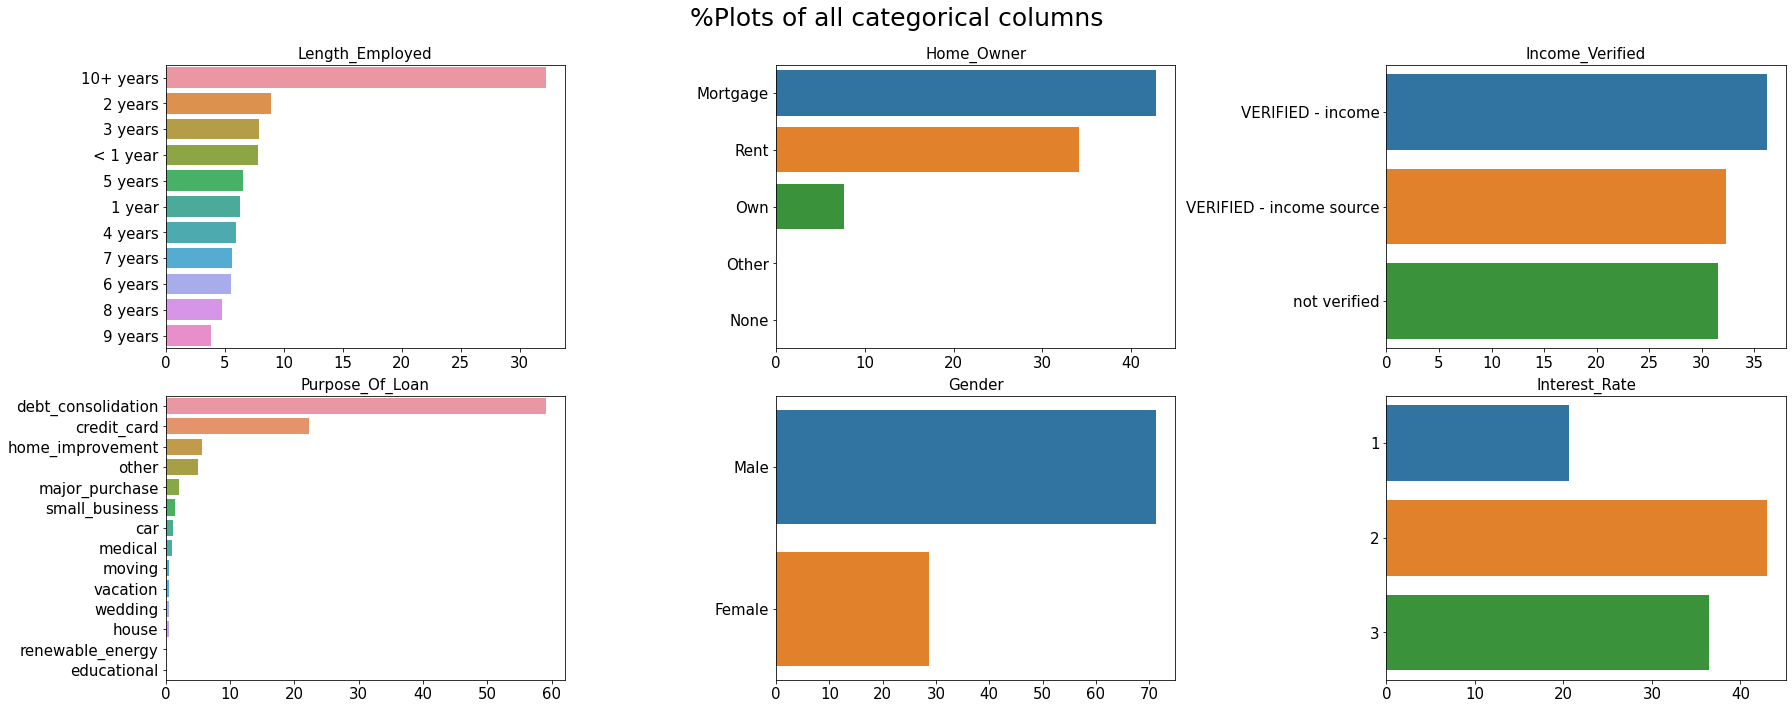

In [33]:
fig,ax = plt.subplots(nrows = 2,ncols=3,figsize = (25,10))
train['Interest_Rate'] = train['Interest_Rate'].astype('object')
for variables,plotsubs in zip(train.select_dtypes('object'),ax.flatten()):
    counts_index,counts_values = train[variables].value_counts().index,train[variables].value_counts().values/len(train)*100
    plotsubs.tick_params(labelsize = 15)
    plotsubs.set_title(variables,fontsize = 15)
    sns.barplot(counts_values,counts_index,ax = plotsubs,orient = 'h')
    plt.tight_layout()
    plt.subplots_adjust(top = 0.90)
    
fig.suptitle('%Plots of all categorical columns',fontsize = 25)
plt.show()
train['Interest_Rate'] = train['Interest_Rate'].astype('int')

### Inferences (Univariate Analysis)

###### Distribution Plots and boxplots
* Annual_Income has a high positive skewness. It contains outliers as can be seen in the boxplots.
* Loan Amount requested has a descent spread and does not contain any outliers.
* Months_Since_Deliquency also contains outliers as can be seen in its boxplot. 
* Rest of the features have a positive skew and can be handled using any transformation techniques like boxcox,log or sqrt. These features also contain outliers.

###### Proportion Plots

* The target variable plot shows us that there are lesser applicants who have received a 1% interest rate as compared to 2-3%.
* Lot of loan applicants have been employed for over 10 years.
* People are mostly taking out loans to clear their credit card bills or to consolidate all their debts into one.
* Most applicants either live on rent or have a mortgage on their house.
* Most past approved applicants have had verified income sources. This feature should have only 2 categories as verified and not veriffied.
* Finally the dataset is male dominated.

In [63]:
train['Income_Verified'].replace('VERIFIED - income source','VERIFIED - income',inplace = True)

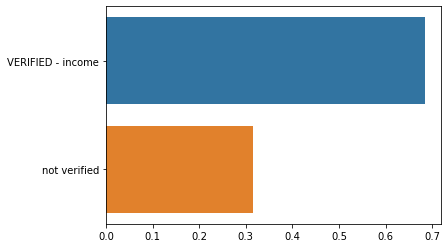

In [64]:
ic_ver = train['Income_Verified'].value_counts(normalize = True)
sns.barplot(ic_ver.values,ic_ver.index,orient = 'h')
plt.show()

###### Outlier Treatment

In [65]:
Q1 = train.drop(['Months_Since_Deliquency'],axis = 1).quantile(0.25)
Q3 = train.drop(['Months_Since_Deliquency'],axis = 1).quantile(0.75)
IQR = Q3-Q1
train_data = train[~((train<(Q1-1.5*IQR)) | (train>(Q3+1.5*IQR))).any(axis = 1)]
train_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725,7 years,Mortgage,75566.4,VERIFIED - income,debt_consolidation,15.88,0,NaN,12,16,Male,3
4,17000,8 years,Own,96000.0,VERIFIED - income,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,4500,2 years,Rent,30000.0,VERIFIED - income,credit_card,10.88,1,NaN,12,15,Male,3


## Group By Analysis

In [83]:
def highest_interest_given(col):
    return train_data.groupby([col,'Interest_Rate'])['Interest_Rate'].count().sort_values().groupby(level=0).tail(1)/train_data.groupby([col])['Interest_Rate'].count()
highest_interest_given('Length_Employed')
#For each category of length_employed around 45% of peple receive the 2% interest rate. This feature may not be playing a significant role in predicting Interest Rate.

Length_Employed  Interest_Rate
9 years          2                0.435361
8 years          2                0.446181
6 years          2                0.436498
7 years          2                0.438105
4 years          2                0.448878
5 years          2                0.433117
1 year           2                0.452847
< 1 year         2                0.442963
3 years          2                0.442598
2 years          2                0.450277
10+ years        2                0.429750
Name: Interest_Rate, dtype: float64

In [84]:
highest_interest_given('Purpose_Of_Loan')

Purpose_Of_Loan     Interest_Rate
renewable_energy    3                0.484848
educational         2                0.625000
wedding             3                0.411598
house               3                0.503356
vacation            3                0.489851
moving              3                0.555291
medical             3                0.479277
car                 2                0.414664
small_business      3                0.543740
major_purchase      2                0.401701
home_improvement    2                0.423195
other               3                0.519407
credit_card         2                0.467553
debt_consolidation  2                0.445415
Name: Interest_Rate, dtype: float64

In [85]:
highest_interest_given('Home_Owner')

Home_Owner  Interest_Rate
None        1                0.500000
Other       2                0.522727
Own         2                0.442392
Rent        2                0.448948
Mortgage    2                0.429951
Name: Interest_Rate, dtype: float64

In [86]:
highest_interest_given('Income_Verified')

Income_Verified    Interest_Rate
not verified       2                0.487009
VERIFIED - income  2                0.414741
Name: Interest_Rate, dtype: float64

In [87]:
highest_interest_given('Gender')

Gender  Interest_Rate
Female  2                0.442796
Male    2                0.436842
Name: Interest_Rate, dtype: float64

###### Inferences

When we look at the highest % of applicants for each categorical feature receiving a certain interest rate slab, we see that only purpose of loan and home_owner seem to have differences in rates of interest received for each applicant. The other features seem to mostly get the 2% interest slab across all categories.

# Bivariate Analysis

###### Correlation Plot

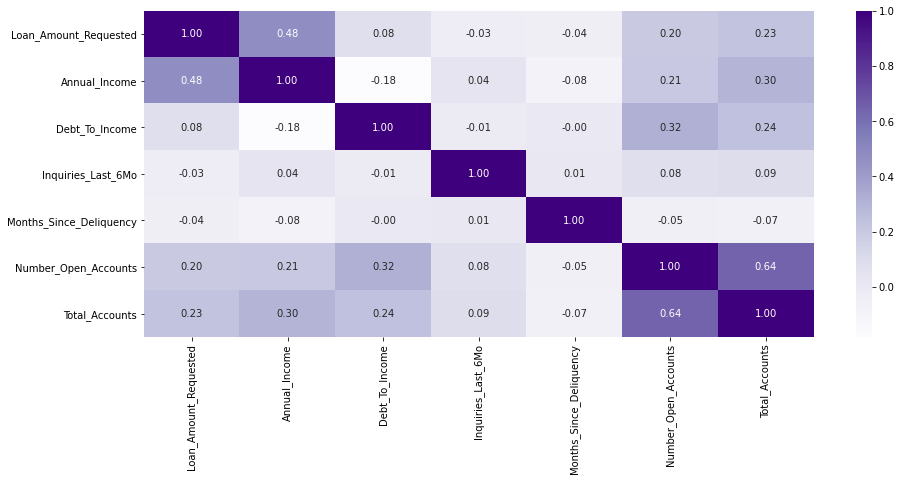

In [61]:
data_num = train_data.drop('Interest_Rate',axis = 1).select_dtypes(np.number)
plt.figure(figsize = (15,6))
sns.heatmap(data_num.corr(),annot = True,fmt = '.2f',cmap = 'Purples')
plt.show()

###### Scatter Plots

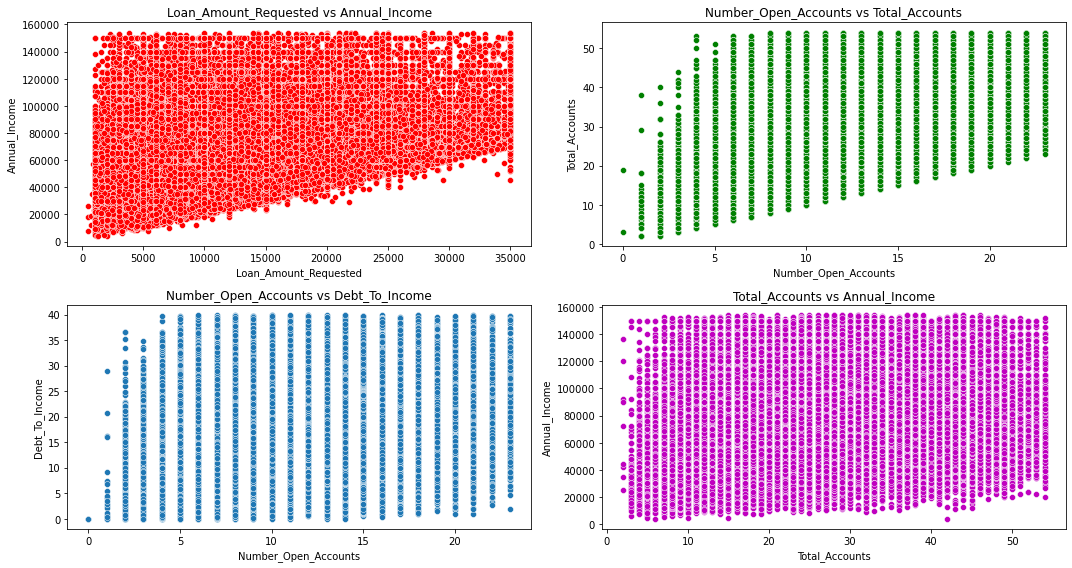

In [62]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,8))
sns.scatterplot('Loan_Amount_Requested','Annual_Income',data = data_num,color = 'r',ax = ax[0,0])
sns.scatterplot('Number_Open_Accounts','Total_Accounts',data = data_num,color = 'g',ax = ax[0,1])
sns.scatterplot('Number_Open_Accounts','Debt_To_Income',data = data_num,ax = ax[1,0])
sns.scatterplot('Total_Accounts','Annual_Income',data = data_num,color = 'm',ax = ax[1,1])

ax[0,0].set_title('Loan_Amount_Requested vs Annual_Income')
ax[0,1].set_title('Number_Open_Accounts vs Total_Accounts')
ax[1,0].set_title('Number_Open_Accounts vs Debt_To_Income')
ax[1,1].set_title('Total_Accounts vs Annual_Income')

plt.tight_layout()
plt.show()
#Below plots are between variables that have a correlation value over 0.3

###### Boxplots

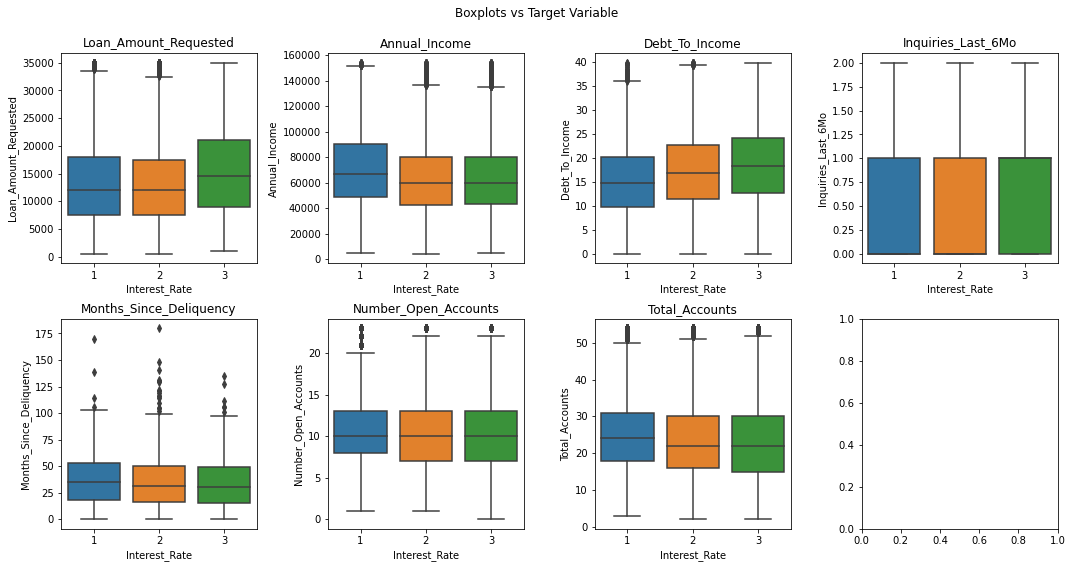

In [63]:
fig,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,8))
for variables,plotsubs in zip(data_num.columns,ax.flatten()):
    plotsubs.set_title(variables)
    sns.boxplot(train_data['Interest_Rate'],data_num[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.90)
fig.suptitle('Boxplots vs Target Variable')
plt.show()

### Inferences (Bivariate Analysis)

###### Correlation Plot

* Strong positive correlation is visible between Annual_Income and Loan_Amount_Requested.
* Strong positive correlation is visible between Total_Accounts and Number_Open_Accounts.
* Moderate positive Correlation visible between Number_Open_Accounts and Debt_To_Income.
* Moderate positive Correlation visible between Annual_Income and Total_Accounts.

###### Scatter Plot

* The scatter plots show us a visual representation of how the higher correlated columns are related.

###### Boxplot

* There is a difference between loan amount requested at rate of interest 3 and the other categories.
* Higher Annual Income people could be getting a lower interest rate as is visible in the boxplot.
* Lower Debt_To_Income gives the applicant a higher chance of receiving a lower interest rate.
* While Deliquency, Number_Open_Accounts and the Total number of accounts do not seem to be playing a major impact in determining the interest rate.


# Filling the Missing Values

In [88]:
train_data.isna().sum()[train_data.isna().sum()!=0]/len(train_data)

Length_Employed            0.046993
Home_Owner                 0.154161
Annual_Income              0.158033
Months_Since_Deliquency    0.546385
dtype: float64

In [89]:
fill_data = train_data.copy()
fill_data = fill_data.drop('Months_Since_Deliquency',axis = 1)

In [90]:
fill_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,24725,7 years,Mortgage,75566.4,VERIFIED - income,debt_consolidation,15.88,0,12,16,Male,3
4,17000,8 years,Own,96000.0,VERIFIED - income,debt_consolidation,22.17,1,19,30,Female,1
5,4500,2 years,Rent,30000.0,VERIFIED - income,credit_card,10.88,1,12,15,Male,3


In [91]:
#Filling Length Employed with mode since only 0.04% of values are missing
fill_data['Length_Employed'] = fill_data['Length_Employed'].fillna(fill_data['Length_Employed'].mode().values[0])

In [92]:
#Filling home owner with max type of home for each employment level.
mapper = dict(fill_data.groupby(['Length_Employed','Home_Owner'])['Home_Owner'].count().sort_values().groupby(level = 0).tail(1).index)
mapper

{'9 years': 'Mortgage',
 '8 years': 'Mortgage',
 '6 years': 'Mortgage',
 '7 years': 'Mortgage',
 '4 years': 'Rent',
 '5 years': 'Mortgage',
 '1 year': 'Rent',
 '3 years': 'Rent',
 '< 1 year': 'Rent',
 '2 years': 'Rent',
 '10+ years': 'Mortgage'}

In [93]:
import math
for i in fill_data[fill_data['Home_Owner'].isna()].index:
    if math.isnan(fill_data['Home_Owner'][i]) == True:
        fill_data['Home_Owner'][i] = mapper[fill_data['Length_Employed'][i]]

In [94]:
fill_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142299 entries, 0 to 164308
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount_Requested  142299 non-null  int64  
 1   Length_Employed        142299 non-null  object 
 2   Home_Owner             142299 non-null  object 
 3   Annual_Income          119811 non-null  float64
 4   Income_Verified        142299 non-null  object 
 5   Purpose_Of_Loan        142299 non-null  object 
 6   Debt_To_Income         142299 non-null  float64
 7   Inquiries_Last_6Mo     142299 non-null  int64  
 8   Number_Open_Accounts   142299 non-null  int64  
 9   Total_Accounts         142299 non-null  int64  
 10  Gender                 142299 non-null  object 
 11  Interest_Rate          142299 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 18.1+ MB


In [95]:
train = train_data.copy()
def len_emp(x):
    if x.split()[0]=='<':
        return 0
    else:
        return int(x.strip().strip('<').strip('year').strip('years').strip().strip('+'))
fill_data['Length_Employed'] = fill_data['Length_Employed'].apply(len_emp)

In [97]:
#Since Months_Since_Deliquency does not seem to show much of an impact on interest_rates we will drop it.
import time
start = time.time()
#Length_Employed can be filled based on annual_income.
#Annual_Income will be filled using KNNImputer on the numerical columns only.
#Home_Owner will be taken care of later.
knn_impute_data=fill_data.select_dtypes(np.number)
#Standardizing the dataset for the KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
ss = StandardScaler()
scaled = pd.DataFrame(ss.fit_transform(knn_impute_data.drop('Interest_Rate',axis = 1)),columns = knn_impute_data.drop('Interest_Rate',axis = 1).columns)
filled_scaled = KNNImputer(n_neighbors = 5).fit_transform(X = scaled,y = knn_impute_data['Interest_Rate'])
end = time.time()
print('Execution Time:',end-start)

Execution Time: 420.4881718158722


In [98]:
filled_unscaled = pd.DataFrame(ss.inverse_transform(filled_scaled),columns = knn_impute_data.drop('Interest_Rate',axis = 1).columns)
fill_data = pd.concat((round(filled_unscaled.reset_index(drop = True)),fill_data.select_dtypes('object').reset_index(drop = True),train_data['Months_Since_Deliquency'].reset_index(drop = True),fill_data['Interest_Rate'].reset_index(drop = True)),axis = 1)

In [99]:
fill_data.isna().sum()[fill_data.isna().sum()!=0]/len(fill_data)

Months_Since_Deliquency    0.546385
dtype: float64

In [100]:
fill_data.shape

(142299, 13)

In [101]:
#Saving as a csv file
fill_data.to_csv('Data/filled_train_28-03.csv',index = False)

In [102]:
#Kept months_since_deliqunecy to decide on what to do with this feature during model building process.

# Statistical Analysis

* Anova Test (Numerical vs Categorical)
* Tukey HSD test (To check if mean difference is present)
* Chi Square Test(Categorical vs Categorical)

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_data = pd.read_csv('Data/filled_train_28-03.csv')

In [3]:
train_data.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Months_Since_Deliquency,Interest_Rate
0,7000.0,0.0,68000.0,18.0,0.0,9.0,14.0,Rent,not verified,car,Female,NaN,1
1,30000.0,4.0,98367.0,15.0,0.0,12.0,24.0,Mortgage,VERIFIED - income,debt_consolidation,Female,17.0,3
2,24725.0,7.0,75566.0,16.0,0.0,12.0,16.0,Mortgage,VERIFIED - income,debt_consolidation,Male,NaN,3
3,17000.0,8.0,96000.0,22.0,1.0,19.0,30.0,Own,VERIFIED - income,debt_consolidation,Female,NaN,1
4,4500.0,2.0,30000.0,11.0,1.0,12.0,15.0,Rent,VERIFIED - income,credit_card,Male,NaN,3


###### Anova Test between numerical and target variable

In [61]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols("Interest_Rate~Loan_Amount_Requested+Length_Employed+Annual_Income+Debt_To_Income+Inquiries_Last_6Mo+Number_Open_Accounts+Total_Accounts+Months_Since_Deliquency",train_data).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Loan_Amount_Requested,1.0,809.908132,809.908132,1840.500543,0.000000e+00
Length_Employed,1.0,3.425165,3.425165,7.783620,5.273749e-03
Annual_Income,1.0,733.329673,733.329673,1666.477480,0.000000e+00
Debt_To_Income,1.0,207.802037,207.802037,472.226104,2.490335e-104
Inquiries_Last_6Mo,1.0,1060.115196,1060.115196,2409.091250,0.000000e+00
Number_Open_Accounts,1.0,230.651395,230.651395,524.150828,1.530824e-115
Total_Accounts,1.0,152.742658,152.742658,347.104733,2.889045e-77
Months_Since_Deliquency,1.0,99.928075,99.928075,227.084616,3.151120e-51
Residual,64540.0,28400.682094,0.440048,NaN,NaN


In [ ]:
sm.stats.anova_lm(model).loc[:,'PR(>F)']<0.05

###### Since all the meaures are below 0.05, we can check for which category variables are seeing a difference in mean using the pairwise tukey hsd test.

In [ ]:
def tukey(data_for_stats,col):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    print("\033[1m"+'Tukey HSD test for {} is:'.format(col)+"\033[0;0m")
    return print(pairwise_tukeyhsd(data_for_stats[col],data_for_stats['Interest_Rate'])),print('*'*80)

In [ ]:
for i in train_data.select_dtypes(np.number).drop(['Interest_Rate','Months_Since_Deliquency'],axis = 1).columns:
    tukey(train_data,i)

In [ ]:
tukey(train_data.dropna(),'Months_Since_Deliquency')
#This feature is having mean differences between the 3 categories.

###### Chi Square Test

In [40]:
from scipy.stats import chi2_contingency
cat_cols = train_data.select_dtypes('object').columns
pval = []
for i in cat_cols:
    cross_tabbed = pd.crosstab(train_data[i],train_data['Interest_Rate'])
    fstat,pvalue,df,freq = chi2_contingency(cross_tabbed)
    pval.append(pvalue)
chi_out = pd.DataFrame({'Feature':cat_cols,'chi_pvalue':pval})
chi_out

,Feature,chi_pvalue
0,Home_Owner,1.742138e-99
1,Income_Verified,0.000000e+00
2,Purpose_Of_Loan,0.000000e+00
3,Gender,1.157345e-01


###### There is no difference in gender within the 3 target categories. We can drop this column

### Infrences

**Anova Test**
* All the numerical columns are having differences in mean for each of the target categories. This can be confirmed by the pariwise Tukey HSD test as well.

**Chi Square Test**
* Gender is the only categorical column that is not seeing any difference within each target ccategory. We can drop this column.

-------------------------------------------------------------------------------------------------------------------------

# <div align = "center">`Exploratory Data Analysis overall summary` </div>

### Dataset Information
* Loan amount requested is coming in categorical summary. Data Type for this column must be changed.
* Drop Loan_ID since it is unique for each entry.
* Missing values are present in the dataset.


### Numerical Columns 5 point Summary
* **Annual_Income** has a max value of $7500000$ which may be an anomaly since 99th percentile value is $240000$ which is much lesser than max value.
* **Debt_To_Income** An ideal debt_to_income ratio between 21-35% is considered good and in this dataset max val is 39.99. This feature is ok.
* **Months_Since_Deliquency** has many missing values however the feature itself may or may not be important.
* **Number_Open_Accounts** The average American has 4 credit cards, according to the 2019 Experian Consumer Credit Review. This feature has outliers since even if we take standard deviation of 3 on above info we would get around 13 open credit accounts. Here there are far too many outliers.
* **Total_Accounts** There are outliers in this column.


### Categorical Columns Summary

* **Length_Employed** has 11 unique categories but +10 seems to have the most records since it covers a big bracket.
* **Home_Owner** Most loan applicants in our dataset have a mortgage on their house.
* **Income_Verified** Most loan applicants have verified income.
* **Purpose_Of_Loan** Loan applicants are looking to stream line their debt into one credit line instead of having multiple credit lines. They are taking loans to pay off their credit card bills.
* **Gender** There are more male loan applicants than female in the dataset.

### Univariate Analysis

**Distribution Plots**

* Annual_Income has a high positive skewness. It contains outliers as can be seen in the boxplots.
* Loan Amount requested has a descent spread and does not contain any outliers.
* Months_Since_Deliquency also contains outliers as can be seen in its boxplot. 
* Rest of the features have a positive skew and can be handled using any transformation techniques like boxcox,log or sqrt. These features also contain outliers.

**Proportion Plots**

* The target variable plot shows us that there are lesser applicants who have received a 1% interest rate as compared to 2-3%.
* Lot of loan applicants have been employed for over 10 years.
* People are mostly taking out loans to clear their credit card bills or to consolidate all their debts into one.
* Most applicants either live on rent or have a mortgage on their house.
* Most past approved applicants have had verified income sources. This feature should have only 2 categories as verified and not veriffied.
* Finally the dataset is male dominated.

### Bivariate Analysis

**Correlation Plot**

* Strong positive correlation is visible between Annual_Income and Loan_Amount_Requested.
* Strong positive correlation is visible between Total_Accounts and Number_Open_Accounts.
* Moderate positive Correlation visible between Number_Open_Accounts and Debt_To_Income.
* Moderate positive Correlation visible between Annual_Income and Total_Accounts.

**Scatter Plot**

* The scatter plots show us a visual representation of how the higher correlated columns are related.

**Boxplot**

* There is a difference between loan amount requested at rate of interest 3 and the other categories.
* Higher Annual Income people could be getting a lower interest rate as is visible in the boxplot.
* Lower Debt_To_Income gives the applicant a higher chance of receiving a lower interest rate.
* While Deliquency, Number_Open_Accounts and the Total number of accounts do not seem to be playing a major impact in determining the interest rate.

### Filling Missing Values
* Filling Length_employed with mode since only 0.04% data was missing.
* Filling Home owner with mode of home_owner for each employment level to have more variation.
* Annual Income was filled using KNNImputer with other numerical features only.
* Months_Since_Delinquency was imputed with the top score that is max+range 180+180 = 360 months
### Statistical Analysis

**Anova Test**
* All the numerical columns are having differences in mean for each of the target categories. This can be confirmed by the pariwise Tukey HSD test as well.

**Chi Square Test**
* Gender is the only categorical column that is not seeing any difference within each target ccategory. We can drop this column.

